# Predict CA house price during 1990

Housing data from 1990 obtained from Kaggle: https://www.kaggle.com/harrywang/housing

The dataset has 9 features and 20640 items.

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns
import math
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
import sklearn.linear_model as lm

In [3]:
path = "/Users/balaji/Downloads/housing/"
df = pd.read_csv(path + "housing.csv")
print("Dataframe shape: ",df.shape,"\n")
print(df.head())

Dataframe shape:  (20640, 10) 

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [5]:
df=df.drop("ocean_proximity",axis=1)

In [7]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [22]:
df.iloc[[290]]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.375,161900.0


In [23]:
df.shape
df = df.dropna()
df.shape

(20433, 9)

In [25]:
print(np.any(np.isnan(df)))

np.all(np.isfinite(df) == False)

False


False

In [67]:
from sklearn import preprocessing
float_array = df.values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(float_array)
standard_scaler = preprocessing.StandardScaler()
scaled_stand = standard_scaler.fit_transform(float_array)

In [27]:
df_normalized = pd.DataFrame(scaled_array, columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'])
print("Dataframe shape: ",df_normalized.shape,"\n")

Dataframe shape:  (20433, 9) 



In [28]:
print(df_normalized[0:5])

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0   0.211155  0.567481            0.784314     0.022331        0.019863   
1   0.212151  0.565356            0.392157     0.180503        0.171477   
2   0.210159  0.564293            1.000000     0.037260        0.029330   
3   0.209163  0.564293            1.000000     0.032352        0.036313   
4   0.209163  0.564293            1.000000     0.041330        0.043296   

   population  households  median_income  median_house_value  
0    0.008941    0.020556       0.539668            0.902266  
1    0.067210    0.186976       0.538027            0.708247  
2    0.013818    0.028943       0.466028            0.695051  
3    0.015555    0.035849       0.354699            0.672783  
4    0.015752    0.042427       0.230776            0.674638  


/Users/balaji/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2862: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10bb0da58>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x110ff1b70>]], dtype=object)

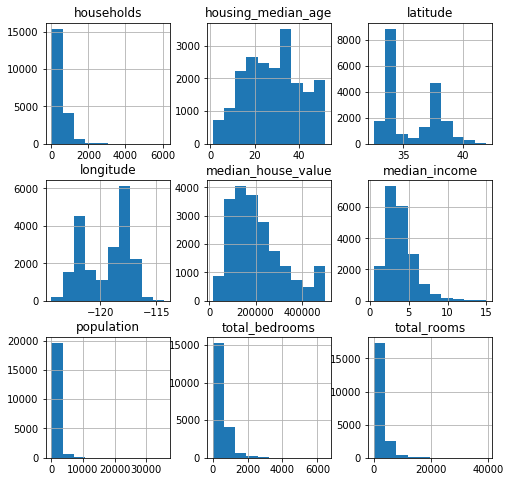

In [29]:
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
df.hist(ax = ax)

In [62]:
corr_matrix = df_normalized.corr()
corr_matrix


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


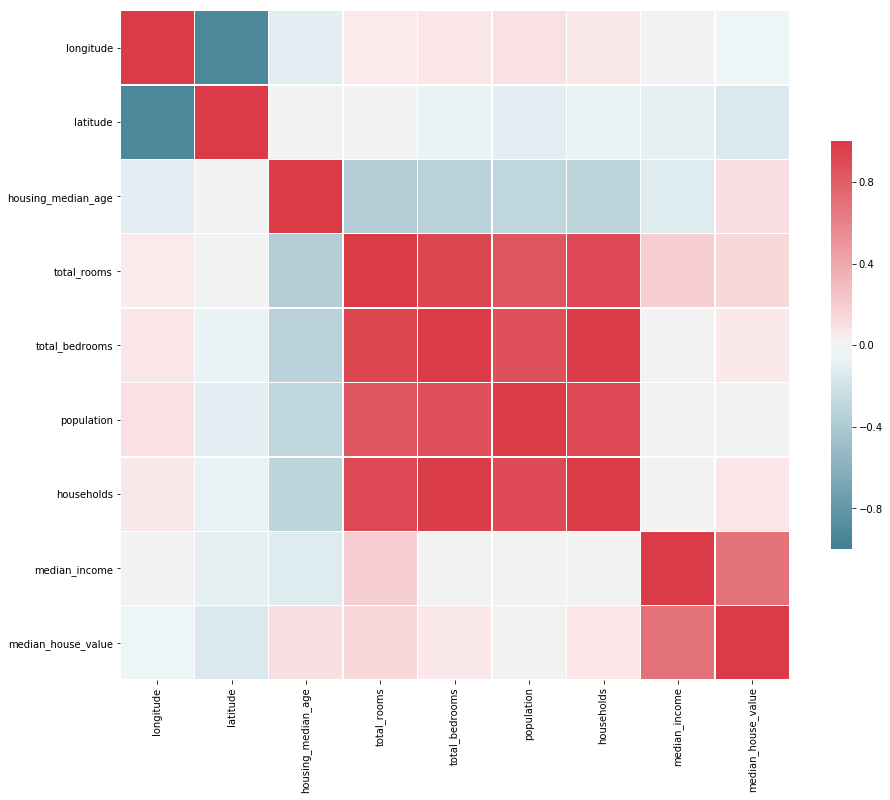

In [65]:
# use seaborn heatmap to generate correlation matrix


fig = plt.figure(figsize = (15,15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#cmap = sns.color_palette("RdBu_r")
# Draw the heatmap with the mask and correct aspect ratio

sns.heatmap(corr_matrix,cmap = cmap,vmax=1.0,vmin= -1.0,center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [30]:
X = df_normalized.drop('median_house_value',axis=1)
y = df_normalized['median_house_value']

In [31]:
# Split data to training and test
from sklearn.model_selection import train_test_split
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
print("X_train shape: ",X_train.shape) # 294 rows, 6 columns
print("y_train shape: ",y_train.shape) # 294 rows, 1 column
print("X_test shape: ",X_test.shape) # 98 rows, 6 columns
print("y_test shape: ",y_test.shape) # 98 rows, 1 column
# print(y_train)

X_train shape:  (15324, 8)
y_train shape:  (15324,)
X_test shape:  (5109, 8)
y_test shape:  (5109,)


In [55]:
``

# Next line is "dictionary" data structure 
d_models = {"Linear_Regression": lm.LinearRegression(),
            "Ridge_0_1": lm.Ridge(alpha=0.1),
            "Ridge_0_5": lm.Ridge(alpha=0.5),
            "Ridge_2_0": lm.Ridge(alpha=2.0),
            "Lasso_0_01": lm.Lasso(alpha=0.01),
            "Lasso_0_05": lm.Lasso(alpha=0.05),
            "Lasso_0_1": lm.Lasso(alpha=0.1),
            "LassoLars_0_01": lm.LassoLars(alpha=0.01),
            "LassoLars_0_05": lm.LassoLars(alpha=0.05),
            "LassoLars_0_1": lm.LassoLars(alpha=0.1),
            "BayesianRidge": lm.BayesianRidge(),
            "ElasticNet": lm.ElasticNet(alpha=0.1),
            "KNeighborsRegressor_3": KNeighborsRegressor(n_neighbors=3),
            "KNeighborsRegressor_5": KNeighborsRegressor(n_neighbors=5),
            "KNeighborsRegressor_2": KNeighborsRegressor(n_neighbors=2),
            "KNeighborsRegressor_4": KNeighborsRegressor(n_neighbors=4)}
models_list = d_models.keys()
print(models_list)

dict_keys(['Linear_Regression', 'Ridge_0_1', 'Ridge_0_5', 'Ridge_2_0', 'Lasso_0_01', 'Lasso_0_05', 'Lasso_0_1', 'LassoLars_0_01', 'LassoLars_0_05', 'LassoLars_0_1', 'BayesianRidge', 'ElasticNet', 'KNeighborsRegressor_3', 'KNeighborsRegressor_5', 'KNeighborsRegressor_2', 'KNeighborsRegressor_4'])


In [57]:
# Model test using min max scaler
for regression_model in models_list:
    regressor = d_models[regression_model]
    regressor.fit(X_train,y_train)
    y_predict = regressor.predict(X_test)
    regression_model_mse = mse(y_predict, y_test)
    score_r2 = r2_score(y_predict, y_test)
    print(regression_model,"  RMSE:",math.sqrt(regression_model_mse),"   R2 Score:",score_r2)


Linear_Regression   RMSE: 0.14315559128168234    R2 Score: 0.450967805465
Ridge_0_1   RMSE: 0.14320862644547872    R2 Score: 0.448263879692
Ridge_0_5   RMSE: 0.14348858644938853    R2 Score: 0.438132213693
Ridge_2_0   RMSE: 0.14474426476860203    R2 Score: 0.407751528906
Lasso_0_01   RMSE: 0.19035327010998015    R2 Score: -3.67727251798
Lasso_0_05   RMSE: 0.24134753814980692    R2 Score: -4.72569062844e+30
Lasso_0_1   RMSE: 0.24134753814980692    R2 Score: -4.72569062844e+30
LassoLars_0_01   RMSE: 0.24134753814980692    R2 Score: -4.72569062844e+30
LassoLars_0_05   RMSE: 0.24134753814980692    R2 Score: -4.72569062844e+30
LassoLars_0_1   RMSE: 0.24134753814980692    R2 Score: -4.72569062844e+30
BayesianRidge   RMSE: 0.14316161401943084    R2 Score: 0.450630468228
ElasticNet   RMSE: 0.24134753814980692    R2 Score: -4.72569062844e+30
KNeighborsRegressor_3   RMSE: 0.1344986392065554    R2 Score: 0.610441482211
KNeighborsRegressor_5   RMSE: 0.13068019126982297    R2 Score: 0.608344141261


In [89]:
# Now let us build a model using the whole dataset for better prediction of new data
# we will use the first entry as the test data and build the model using all the other elements.

final_X = X[1:]
final_y = y[1:]

knn_3_model = KNeighborsRegressor(n_neighbors=3)
knn_3_model.fit(final_X, final_y)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [90]:
# Now let us test our model on the first item in the dataset.

test_data = np.array([df.iloc[0]])
expected_test_out = df.iloc[0, 8]

# rescale test data
test_transform = standard_scaler.transform(test_data) # apply the same transform
print("Normalized new test row :", test_transform)

Normalized new test row : [[-1.32731375  1.05171726  0.98216331 -0.8038126  -0.97032521 -0.97331952
  -0.97683327  2.34516291  2.12881864]]


In [91]:
test_1 = list(test_transform[0][:8]) # Extract all values excluding sound_dbs
test_seq = [test_1] # make a list of list
test_result = knn_3_model.predict(test_seq) # apply model prediction
print("Test result house value (still normalized): ",test_result[0]) # this is still normalized mpg result

Test result house value (still normalized):  1.0


In [93]:
test_transform[0][8] = test_result[0] # put result back, replace dummy with predicted
print("Test row with predicted (still normalized): ",test_transform)
result = standard_scaler.inverse_transform(test_transform) # apply inverse transform
print("Final test result: ",result)
print("Predicted house price: ",result[0][8])
print("Actual house price: ", expected_test_out)

Test row with predicted (still normalized):  [[-1.32731375  1.05171726  0.98216331 -0.8038126  -0.97032521 -0.97331952
  -0.97683327  2.34516291  1.        ]]
Final test result:  [[ -1.22230000e+02   3.78800000e+01   4.10000000e+01   8.80000000e+02
    1.29000000e+02   3.22000000e+02   1.26000000e+02   8.32520000e+00
    3.22297255e+05]]
Predicted house price:  322297.255483
Actual house price:  452600.0


## Conclusions

KNN with n = 3 was the best model among the various models tried.  However, it has an R2 score of 0.61 only.
This can be potentially be improved by feature selection and cross validation techniques.